##### **Project Type**    - Classification
##### **Contribution**    - Individual

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Dataset Loading

In [7]:
df = pd.read_csv("train_data.csv")

### Dataset First View

In [8]:
df.head()

,filename,Glioma,Meningioma,No Tumor,Pituitary
0,Tr-pi_0164_jpg.rf.000776527ec0acdc89e31e15a352...,0,0,0,1
1,Tr-no_0426_jpg.rf.0026b06f369c5d51aca4c4c9beba...,0,0,1,0
2,Tr-gl_0496_jpg.rf.010620fbbbaa509aa81d7ce5bdf7...,1,0,0,0
3,Tr-gl_0554_jpg.rf.010a72c1c25cc9ce83c77fbb23db...,1,0,0,0
4,Tr-me_0185_jpg.rf.0094b0b539582e2f95ae7b6ada4d...,0,1,0,0


### Dataset Rows & Columns count

In [9]:
df.shape

(1695, 5)

### Dataset Information

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1695 entries, 0 to 1694
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   filename     1695 non-null   object
 1    Glioma      1695 non-null   int64 
 2    Meningioma  1695 non-null   int64 
 3    No Tumor    1695 non-null   int64 
 4    Pituitary   1695 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 66.3+ KB


#### Missing Values/Null Values

In [11]:
df.isnull().sum()

filename       0
 Glioma        0
 Meningioma    0
 No Tumor      0
 Pituitary     0
dtype: int64

### What did you know about your dataset?

This data set is clean and gives us information about images of tumor.

## ***2. Understanding Your Variables***

In [12]:
# Dataset Columns
df.columns

Index(['filename', ' Glioma', ' Meningioma', ' No Tumor', ' Pituitary'], dtype='object')

In [13]:
# Dataset Describe
df.describe()

,Glioma,Meningioma,No Tumor,Pituitary
count,1695.000000,1695.000000,1695.000000,1695.000000
mean,0.332743,0.211209,0.197640,0.258407
std,0.471335,0.408287,0.398337,0.437888
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000


### Variables Description

We have four category eac

### Check Unique Values for each variable.

In [14]:
# Count the number of images for each type
glioma_count = df[' Glioma'].sum()
meningioma_count = df[' Meningioma'].sum()
no_tumor_count = df[' No Tumor'].sum()
pituitary_count = df[' Pituitary'].sum()


In [15]:
# Print the results
print("Glioma:", glioma_count)
print("Meningioma:", meningioma_count)
print("No Tumor:", no_tumor_count)
print("Pituitary:", pituitary_count)

Glioma: 564
Meningioma: 358
No Tumor: 335
Pituitary: 438


### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

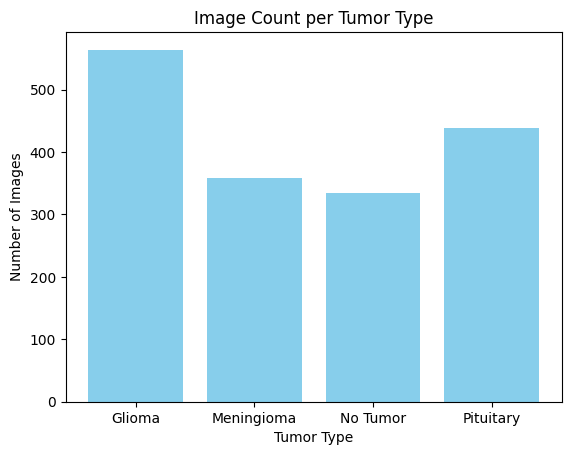

In [16]:
# Chart - 1 visualization code
import matplotlib.pyplot as plt

counts = {
    'Glioma': glioma_count,
    'Meningioma': meningioma_count,
    'No Tumor': no_tumor_count,
    'Pituitary': pituitary_count
}

plt.bar(counts.keys(), counts.values(), color='skyblue')
plt.title('Image Count per Tumor Type')
plt.ylabel('Number of Images')
plt.xlabel('Tumor Type')
plt.show()


##### 1. Why did you pick the specific chart?

To know how many images do we have of each category.

##### 2. What is/are the insight(s) found from the chart?

Giloma category has highest number of images.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

No.

## ***6. Feature Engineering & Data Pre-processing***

In [17]:
!pip install tensorflow
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
import matplotlib.pyplot as plt

## ***7. ML Model Implementation***

### ML Model - 1

In [21]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_path = 'tumor images/train'
val_path = 'tumor images/valid'
test_path = 'tumor images/test'

train_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.2, horizontal_flip=True)
val_gen = ImageDataGenerator(rescale=1./255)
test_gen = ImageDataGenerator(rescale=1./255)

train_data = train_gen.flow_from_directory(train_path, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical')
val_data = val_gen.flow_from_directory(val_path, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical')
test_data = test_gen.flow_from_directory(test_path, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical', shuffle=False)

Found 1695 images belonging to 4 classes.
Found 502 images belonging to 4 classes.
Found 246 images belonging to 4 classes.


In [22]:
base_model = ResNet50(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze base model

x = GlobalAveragePooling2D()(base_model.output)
x = Dense(128, activation='relu')(x)
output = Dense(4, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 45s 0us/step


In [23]:
history = model.fit(train_data, epochs=10, validation_data=val_data)

C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - accuracy: 0.3728 - loss: 1.3178 - val_accuracy: 0.4761 - val_loss: 1.1547
Epoch 2/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.4678 - loss: 1.1900 - val_accuracy: 0.5438 - val_loss: 1.0105
Epoch 3/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 65s 1s/step - accuracy: 0.5199 - loss: 1.1050 - val_accuracy: 0.6315 - val_loss: 1.0016
Epoch 4/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 63s 1s/step - accuracy: 0.5932 - loss: 0.9908 - val_accuracy: 0.6474 - val_loss: 0.9660
Epoch 5/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - accuracy: 0.6562 - loss: 0.9540 - val_accuracy: 0.6992 - val_loss: 0.8519
Epoch 6/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.6301 - loss: 0.9462 - val_accuracy: 0.6992 - val_loss: 0.8550
Epoch 7/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 61s 1s/step - accuracy: 0.6193 - loss: 0.9592 - val_accuracy: 0.6574 - val_loss: 0.8473
Epoch 8/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 61s 1s/step - accuracy: 0.6276 - loss: 0.9427 - val_accuracy: 0.7072 - val_loss:

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [26]:
model.save('resnet_model.h5')


In [24]:
# Visualizing evaluation Metric Score chart
loss, acc = model.evaluate(test_data)
print(f"Test Accuracy: {acc:.2f}")


C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 755ms/step - accuracy: 0.6866 - loss: 0.8582
Test Accuracy: 0.68


#### 2. Cross- Validation & Hyperparameter Tuning

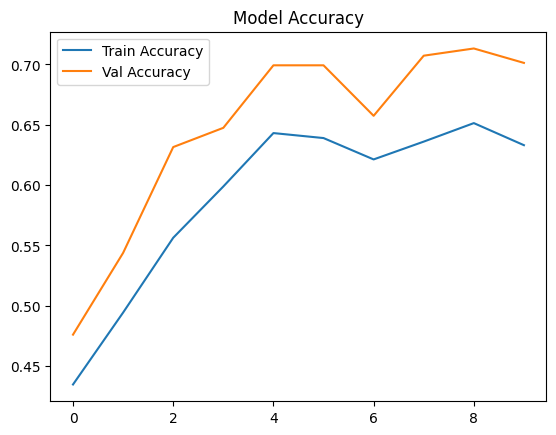

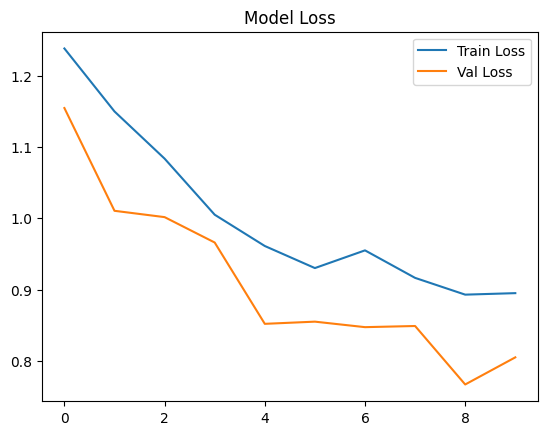

In [25]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Model Loss')
plt.show()

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [28]:
model.save('resnet_model.h5')

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***